# Reading and Analysing Dataset

In [2]:
## Loading Necessary Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Load dataset
df1 = pd.read_csv('Z:/NEU/ALY 6040 - Data Mining/Module 3/Titanic-Dataset-1.csv')

# General dataset overview
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,846,0.0,3,"Abbing, Mr. Anthony",male,42.0,0,0.0,C.A. 5547,7.55,NaN,S
1,747,0.0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1.0,C.A. 2673,20.25,NaN,S
2,280,1.0,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1.0,C.A. 2673,20.25,NaN,S
3,309,0.0,2,"Abelson, Mr. Samuel",male,30.0,1,0.0,P/PP 3381,24.00,NaN,C
4,875,1.0,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0.0,P/PP 3381,24.00,NaN,C


In [4]:
# shape of the dataframe
df1.shape

(891, 12)

In [5]:
# checking any duplicate rows
duplicate_count = df1.duplicated().sum()
duplicate_count

0

# Data Pre-Processing

### Finding Missing Values

In [8]:
#Checking for blank values in percentage
blank_percentage = (df1.apply(lambda x: (x == "").sum()) / len(df1)) * 100
blank_df = blank_percentage[blank_percentage > 0].reset_index()
blank_df.columns = ['Column', 'Blank_Percentage']
blank_df

,Column,Blank_Percentage


In [9]:
# checking for NULL values in Percentage
NA_percentage = (df1.isnull().sum() / len(df1)) * 100
NA_df = NA_percentage[NA_percentage > 0].reset_index()
NA_df.columns = ['Column', 'NA_Percentage']
NA_df

,Column,NA_Percentage
0,Survived,0.673401
1,Age,19.865320
2,Parch,0.785634
3,Cabin,77.104377
4,Embarked,0.224467


### Removing columns

In [11]:
# Removing columns having missing Values more than 60%
threshold = 60  # Set your threshold percentage

# Identify columns to drop
columns_to_drop = NA_percentage[NA_percentage >= threshold].index

# Drop the columns
df1 = df1.drop(columns=columns_to_drop)

print(f"Removed columns: {list(columns_to_drop)}")

Removed columns: ['Cabin']


In [12]:
# Removing unnecessary columns
df1.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [13]:
df1.shape

(891, 8)

### Handling Missing Values
- For numerical/continuous we can use mean or median. But, median is preferred as it is unaffected by extreme values.
- For categorical/discrete columns we can use mode for imputing the missing values.

In [15]:
 # Fill missing Survived with Mode
df1['Survived'].fillna(df1['Survived'].mode()[0], inplace=True)  

# Fill missing Age with median
df1['Age'].fillna(df1['Age'].median(), inplace=True)

# Fill missing Parch with mode
df1['Parch'].fillna(df1['Parch'].mode()[0], inplace=True) 

# Fill missing Embarked with mode
df1['Embarked'].fillna(df1['Embarked'].mode()[0], inplace=True)  

In [16]:
# Re-checking for NULL values in Percentage
NA_percentage = (df1.isnull().sum() / len(df1)) * 100
NA_df = NA_percentage[NA_percentage > 0].reset_index()
NA_df.columns = ['Column', 'NA_Percentage']
NA_df

,Column,NA_Percentage


In [17]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,42.0,0,0.0,7.55,S
1,0.0,3,male,16.0,1,1.0,20.25,S
2,1.0,3,female,35.0,1,1.0,20.25,S
3,0.0,2,male,30.0,1,0.0,24.00,C
4,1.0,2,female,28.0,1,0.0,24.00,C


### Detecting Outliers

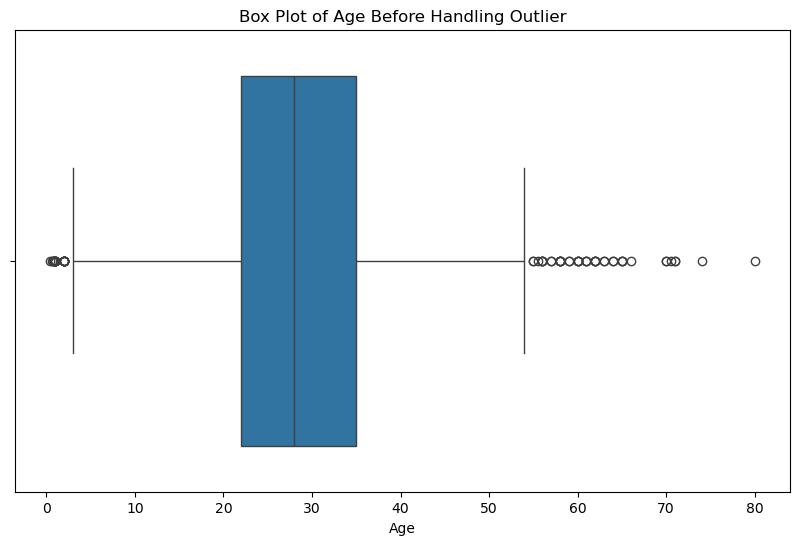

In [19]:
# Box plot for 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['Age'])
plt.title('Box Plot of Age Before Handling Outlier')
plt.show()

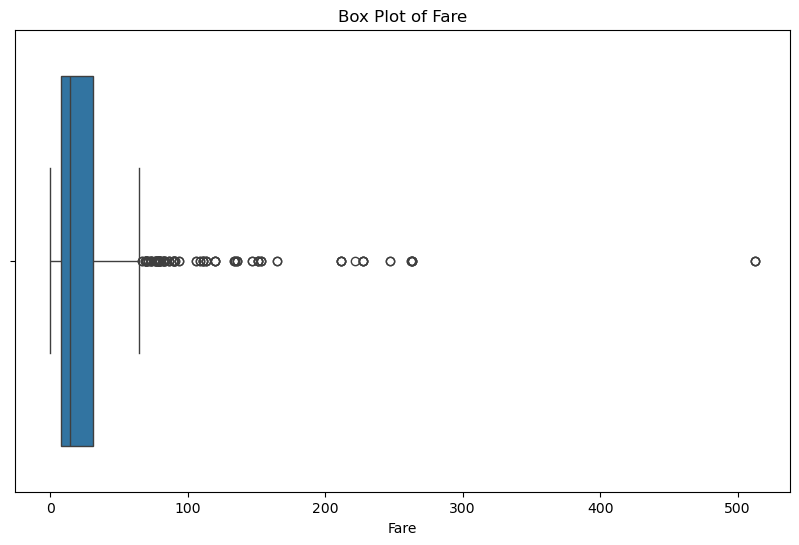

In [20]:
# Box plot for 'Fare'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['Fare'])
plt.title('Box Plot of Fare')
plt.show()

### Hanndling Outliers

In [22]:
# Capping the Age at the 99th percentile
age_upper_limit = df1['Age'].quantile(0.99)
df1['Age'] = np.where(df1['Age'] > age_upper_limit, age_upper_limit, df1['Age'])

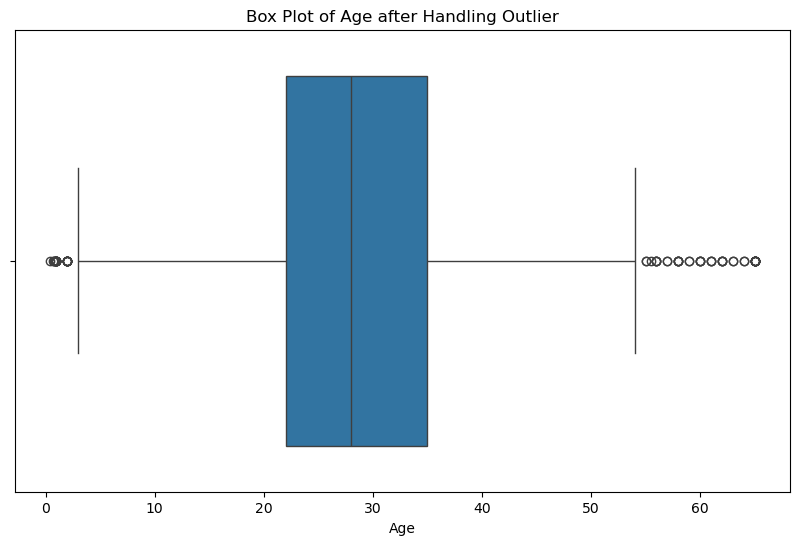

In [23]:
# Box plot for 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df1['Age'])
plt.title('Box Plot of Age after Handling Outlier')
plt.show()

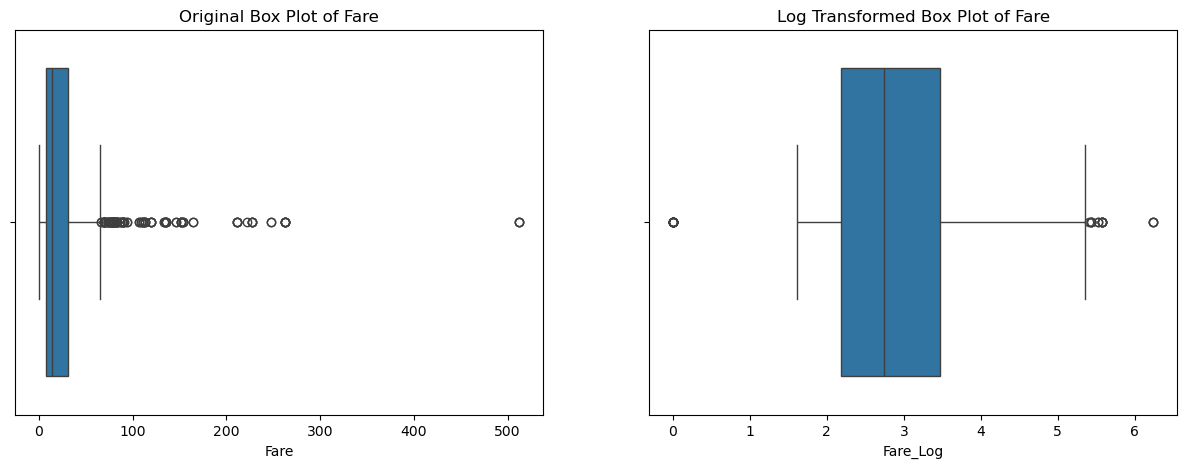

In [24]:
# Handling Outliers for 'Fare'
# Log transformation
df1['Fare_Log'] = np.log1p(df1['Fare'])  # Using log1p which is log(1+x) to handle zero fares gracefully

# Plot to see the effects of transformations
plt.figure(figsize=(15, 5))

# Original Fare box plot
plt.subplot(1, 2, 1)
sns.boxplot(x=df1['Fare'])
plt.title('Original Box Plot of Fare')

# Transformed Fare box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df1['Fare_Log'])
plt.title('Log Transformed Box Plot of Fare')

plt.show()

### variables Encoding

In [26]:
le = LabelEncoder()

# Convert 'Sex' into numerical format
df1['Sex'] = le.fit_transform(df1['Sex'])

# Convert 'Embarked' into numerical format
df1['Embarked'] = le.fit_transform(df1['Embarked'])

df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Log
0,0.0,3,1,42.0,0,0.0,7.55,2,2.145931
1,0.0,3,1,16.0,1,1.0,20.25,2,3.056357
2,1.0,3,0,35.0,1,1.0,20.25,2,3.056357
3,0.0,2,1,30.0,1,0.0,24.00,0,3.218876
4,1.0,2,0,28.0,1,0.0,24.00,0,3.218876


# Exploratory Data Analysis (EDA)

### Formulating Hypotheses with Visualization

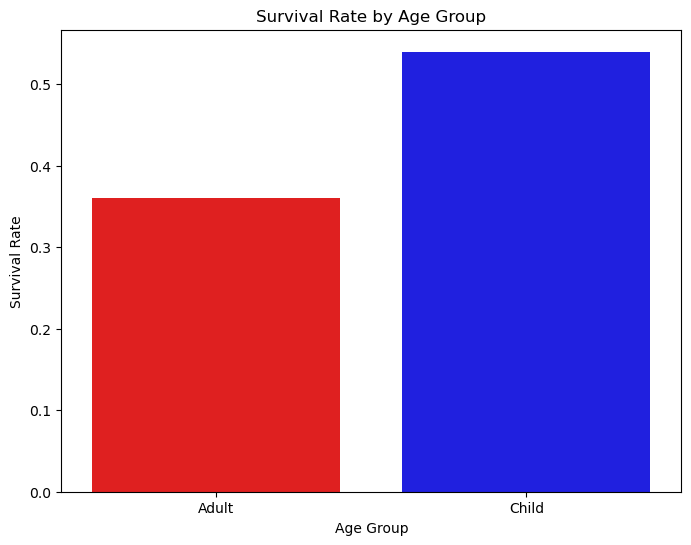

In [29]:
# Hypothesis 1: Elder passengers (Adults) had a higher survival rate than younger passengers (children).

# Define age groups: Children (<18), Adults (>=18)
df1['AgeGroup'] = df1['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')

# Calculate survival rates by age group
age_group_survival_rate = df1.groupby('AgeGroup')['Survived'].mean()

# Visualization for Hypothesis
plt.figure(figsize=(8, 6))
# Specify the colors in the order of the categories displayed
bar_colors = ['red' if age == 'Adult' else 'blue' for age in age_group_survival_rate.index]
sns.barplot(x=age_group_survival_rate.index, y=age_group_survival_rate.values, palette=bar_colors)
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show()

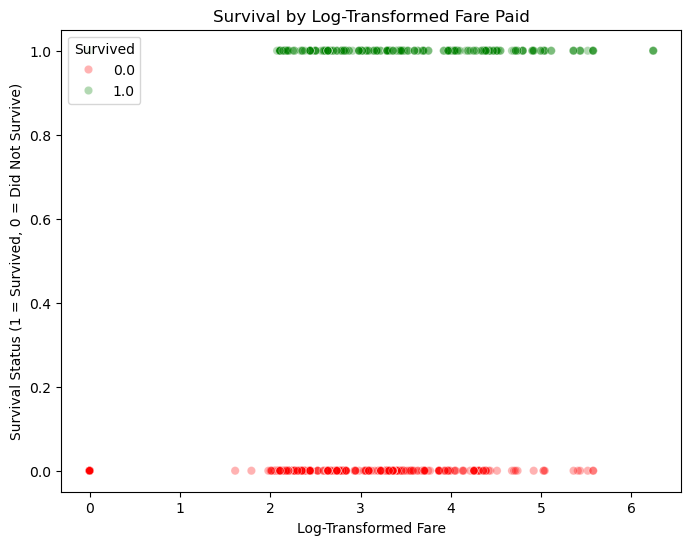

In [30]:
# Hypothesis 2: Passengers who paid higher fares were more likely to survive.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fare_Log', y='Survived', data=df1, alpha=0.3, hue='Survived', palette={0: 'red', 1: 'green'})
plt.title('Survival by Log-Transformed Fare Paid')
plt.xlabel('Log-Transformed Fare')
plt.ylabel('Survival Status (1 = Survived, 0 = Did Not Survive)')

# Move the legend to the middle left side of the plot
plt.legend(title='Survived', loc='upper left')

plt.show()

In [31]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Log,AgeGroup
0,0.0,3,1,42.0,0,0.0,7.55,2,2.145931,Adult
1,0.0,3,1,16.0,1,1.0,20.25,2,3.056357,Child
2,1.0,3,0,35.0,1,1.0,20.25,2,3.056357,Adult
3,0.0,2,1,30.0,1,0.0,24.00,0,3.218876,Adult
4,1.0,2,0,28.0,1,0.0,24.00,0,3.218876,Adult


In [32]:
print(df1['Sex'].unique())

[1 0]


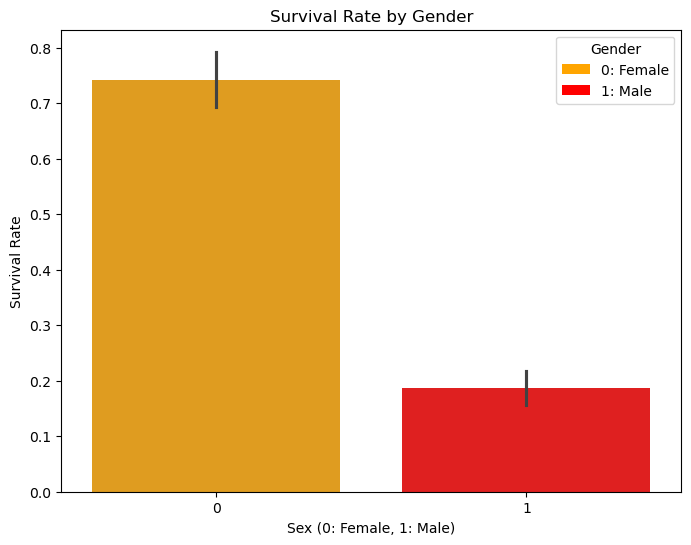

In [33]:
from matplotlib.patches import Patch

# Hypothesis 3: Women had a higher survival rate than men.

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Sex', y='Survived', data=df1, palette={'0': 'orange', '1': 'red'})
plt.title('Survival Rate by Gender')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Survival Rate')

# Create legend manually
legend_labels = [Patch(facecolor='orange', label='0: Female'),
                 Patch(facecolor='red', label='1: Male')]
plt.legend(handles=legend_labels, title='Gender', loc='upper right')
plt.show()

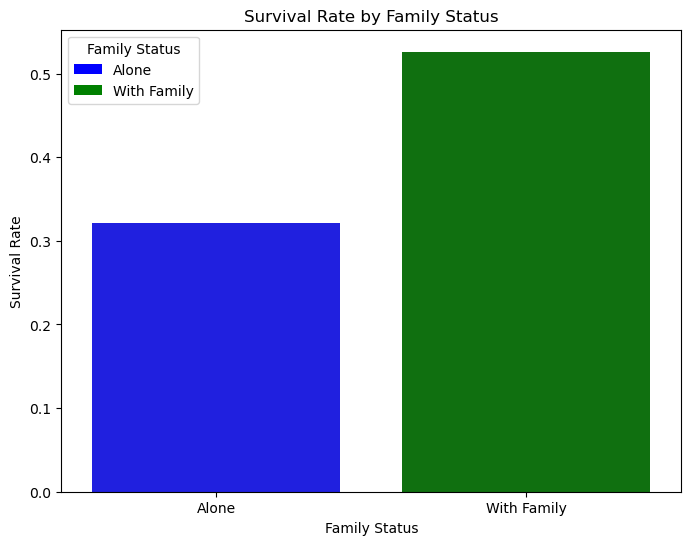

In [34]:
# Hypothesis 4: Passengers with family aboard (SibSp or Parch = 1) had a higher survival rate than those traveling alone.

# Define family status: With family (either SibSp or Parch = 1), Alone (both SibSp and Parch = 0)
df1['FamilyStatus'] = df1.apply(lambda row: 'With Family' if row['SibSp'] == 1 or row['Parch'] == 1 else 'Alone', axis=1)

# Calculate survival rates by family status
family_status_survival_rate = df1.groupby('FamilyStatus')['Survived'].mean()

# Visualization for Hypothesis 4
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=family_status_survival_rate.index, y=family_status_survival_rate.values, palette=['blue', 'green'])
plt.title("Survival Rate by Family Status")
plt.xlabel("Family Status")
plt.ylabel("Survival Rate")

# Create legend manually
legend_labels = [Patch(facecolor='blue', label='Alone'),
                 Patch(facecolor='green', label='With Family')]
plt.legend(handles=legend_labels, title='Family Status')

plt.show()

### Principal Component Analysis (PCA)

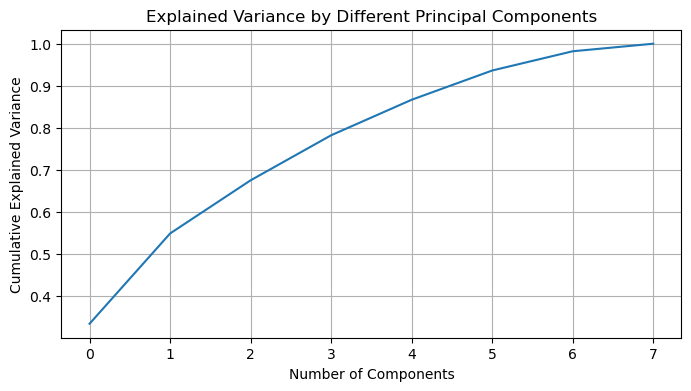

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separating out the features and the target variable
features = df1.drop(['Survived', 'AgeGroup', 'FamilyStatus'], axis=1)
target = df1['Survived']

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA without specifying n_components to evaluate all
pca = PCA()
pca.fit(features_scaled)  # Ensure to fit the PCA model

# Plotting the Explained Variance to find the best n_components
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))  # Now this should work as pca is fitted
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.grid(True)
plt.show()


In [37]:
# Applying PCA
# Reduce dimensions to 2 for simplicity;
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Include target variable for complete dataset
df_pca['Survived'] = target

# Model Development and Evaluation

### Splitting Datasets into Train and Test

In [40]:
# Splitting datasets for training
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_pca[['PC1', 'PC2']], df_pca['Survived'], test_size=0.2, random_state=42)

### Logistic Regression using Lasso regularization on Original Data

In [42]:
# Lasso Regularization in Logistic Regression on Original Data
lasso_lr = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)  # C is the inverse of regularization strength
lasso_lr.fit(X_train, y_train)
predictions_lasso_lr = lasso_lr.predict(X_test)

# Evaluation
print("Lasso Logistic Regression Confusion Matrix and Classification Report:")
print(confusion_matrix(y_test, predictions_lasso_lr))
print(classification_report(y_test, predictions_lasso_lr))

Lasso Logistic Regression Confusion Matrix and Classification Report:
[[96 25]
 [14 44]]
              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83       121
         1.0       0.64      0.76      0.69        58

    accuracy                           0.78       179
   macro avg       0.76      0.78      0.76       179
weighted avg       0.80      0.78      0.79       179



### Random Forest on Original Data

In [44]:
# Random Forest on Original Data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)

print("Random Forest Confusion Matrix and Classification Report:")
print(confusion_matrix(y_test, predictions_rf))
print(classification_report(y_test, predictions_rf))

Random Forest Confusion Matrix and Classification Report:
[[98 23]
 [16 42]]
              precision    recall  f1-score   support

         0.0       0.86      0.81      0.83       121
         1.0       0.65      0.72      0.68        58

    accuracy                           0.78       179
   macro avg       0.75      0.77      0.76       179
weighted avg       0.79      0.78      0.79       179



### Random Forest on PCA Data

In [46]:
# Random Forest on PCA Data
rf_pca = RandomForestClassifier()
rf_pca.fit(X_train_pca, y_train_pca)
predictions_rf_pca = rf_pca.predict(X_test_pca)

print("PCA-based Random Forest Confusion Matrix and Classification Report:")
print(confusion_matrix(y_test_pca, predictions_rf_pca))
print(classification_report(y_test_pca, predictions_rf_pca))

PCA-based Random Forest Confusion Matrix and Classification Report:
[[89 32]
 [26 32]]
              precision    recall  f1-score   support

         0.0       0.77      0.74      0.75       121
         1.0       0.50      0.55      0.52        58

    accuracy                           0.68       179
   macro avg       0.64      0.64      0.64       179
weighted avg       0.69      0.68      0.68       179



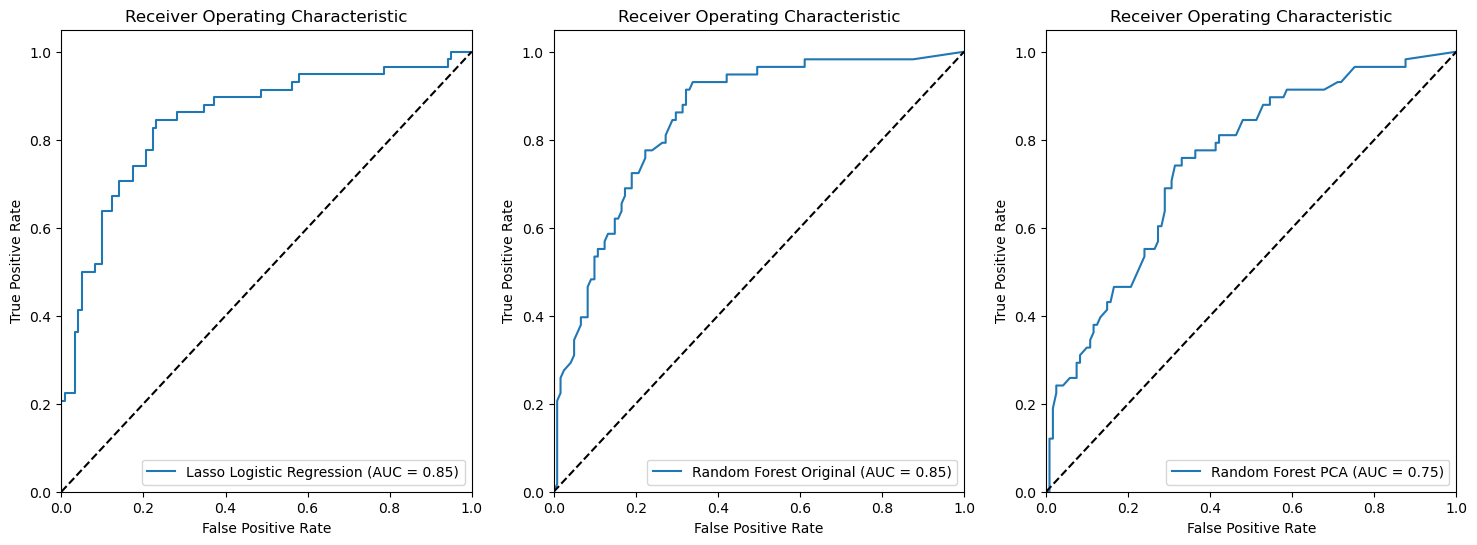

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC Curve
def plot_roc_curve(model, X_test, y_test, model_name, ax):
    # Predict probabilities for the positive class
    probas_ = model.predict_proba(X_test)[:, 1]
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic')
    ax.legend(loc="lower right")

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot ROC Curve for Lasso Logistic Regression
plot_roc_curve(lasso_lr, X_test, y_test, 'Lasso Logistic Regression', axes[0])

# Plot ROC Curve for Random Forest on Original Data
plot_roc_curve(rf, X_test, y_test, 'Random Forest Original', axes[1])

# Plot ROC Curve for Random Forest on PCA Data
plot_roc_curve(rf_pca, X_test_pca, y_test_pca, 'Random Forest PCA', axes[2])

plt.show()


### Ploting ROC, AUC

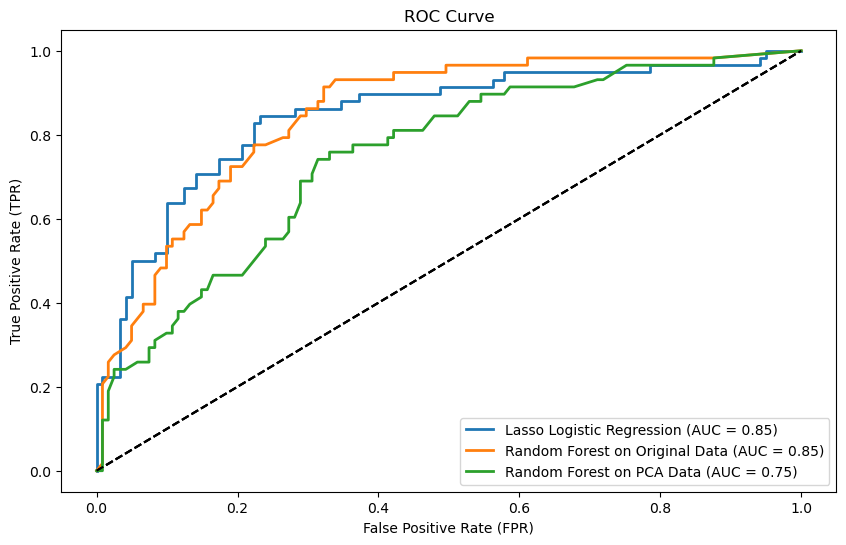

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC Curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

# Lasso Logistic Regression
probs_lasso_lr = lasso_lr.predict_proba(X_test)[:, 1]  # probability estimates
fpr_lasso, tpr_lasso, _ = roc_curve(y_test, probs_lasso_lr)
auc_lasso = roc_auc_score(y_test, probs_lasso_lr)

# Random Forest on Original Data
probs_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_rf)
auc_rf = roc_auc_score(y_test, probs_rf)

# Random Forest on PCA Data
probs_rf_pca = rf_pca.predict_proba(X_test_pca)[:, 1]
fpr_rf_pca, tpr_rf_pca, _ = roc_curve(y_test_pca, probs_rf_pca)
auc_rf_pca = roc_auc_score(y_test_pca, probs_rf_pca)

# Plotting ROC Curves for all models
plt.figure(figsize=(10, 6))
plot_roc_curve(fpr_lasso, tpr_lasso, f'Lasso Logistic Regression (AUC = {auc_lasso:.2f})')
plot_roc_curve(fpr_rf, tpr_rf, f'Random Forest on Original Data (AUC = {auc_rf:.2f})')
plot_roc_curve(fpr_rf_pca, tpr_rf_pca, f'Random Forest on PCA Data (AUC = {auc_rf_pca:.2f})')
plt.show()


### feature importances

In [51]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {X_train.columns[indices[f]]} ({importances[indices[f]]})")


Feature ranking:
1. feature Sex (0.24302854577510907)
2. feature Age (0.23274594656300923)
3. feature Fare_Log (0.16830283650579714)
4. feature Fare (0.15625257292126252)
5. feature Pclass (0.0786327087228973)
6. feature SibSp (0.04867435029671976)
7. feature Parch (0.038180146828697595)
8. feature Embarked (0.034182892386507444)


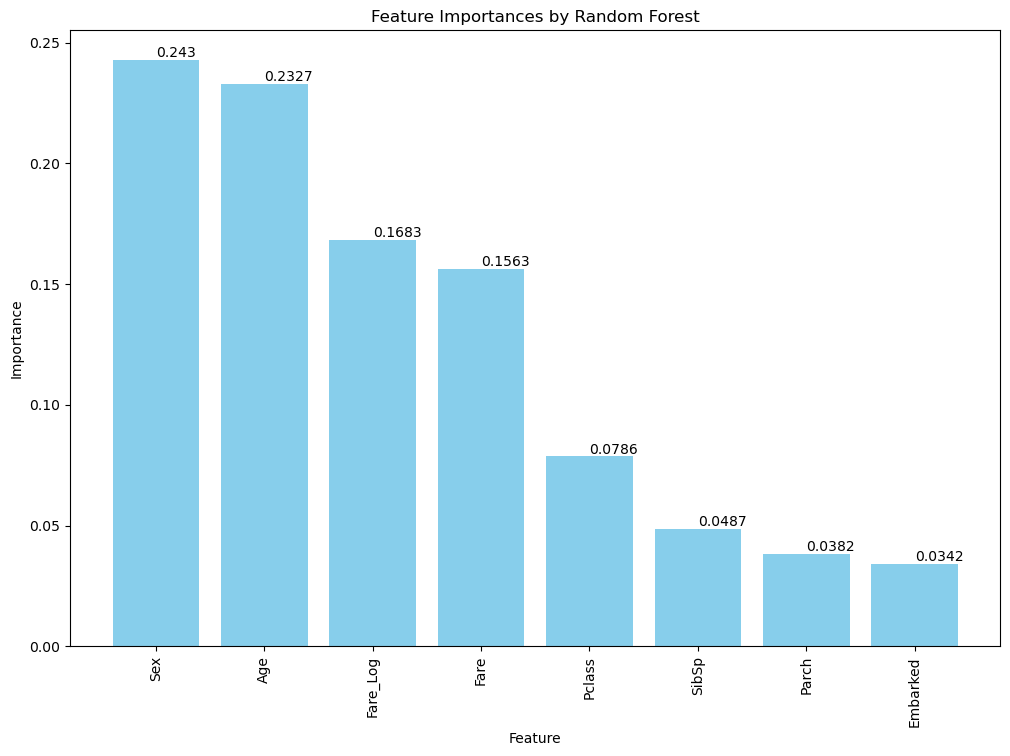

In [52]:
# Plotting
plt.figure(figsize=(12, 8))
plt.title('Feature Importances by Random Forest')
bars = plt.bar(range(X_train.shape[1]), importances[indices], align='center', color='skyblue')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')

# Adding the text labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom')  # va: vertical alignment

plt.show()